# Project Title
### CPTR 141 Final Project

Student Name: Aiden Davis

## Introduction
The dataset I selected is shark attacks. i selected this dataset because i like sharks. I also thought this data set would provide a good ammount of differnt data types for me to analyse.

## Dataset
  There are several different types of data i aim to get from this data set. i wanted to see which countries had the most shark attacks, and which years the most shark attacks occured. i was also interested in the different causes of shark attacks, and which were most common. another thing i wanted to learn was whether men or women were more likely to get attaked. i also wanted to be able to look at a specific year or country and be able to extract key information about the shark atacks there.

[shark attack dataset](https://www.kaggle.com/datasets/gauravkumar2525/shark-attacks?resource=download).

###Columns:
* Date
* year
* type
* country
* area
* location
* activity
* name
* sex
* age
* fatal_y_n
* time
* species


Data Analysis Options:
1) Years with most shark attacks 
2) Countries with most shark attacks 
3) Causes recorded 
4) Sex of individuals attacked 
5) Fatal Vs non-fatal atacks 
6) Oldest recorded year with an attack 
7) Most recent recorded year with an attack 
8) Statistics of a specific year 
9) Statistics of a specific country
10) Create a graph of shark attacks over years in a country
0) Exit
Please select an analysis option:1
How many years would you like to view:1
The top 1 years with the most shark attacks are: [('2015', 143)]
Continue analysis? (y/n)y
Data Analysis Options:
1) Years with most shark attacks 
2) Countries with most shark attacks 
3) Causes recorded 
4) Sex of individuals attacked 
5) Fatal Vs non-fatal atacks 
6) Oldest recorded year with an attack 
7) Most recent recorded year with an attack 
8) Statistics of a specific year 
9) Statistics of a specific country
10) Create a graph of shark attacks over years in a country
0) Exit
Please select an analysis option:1

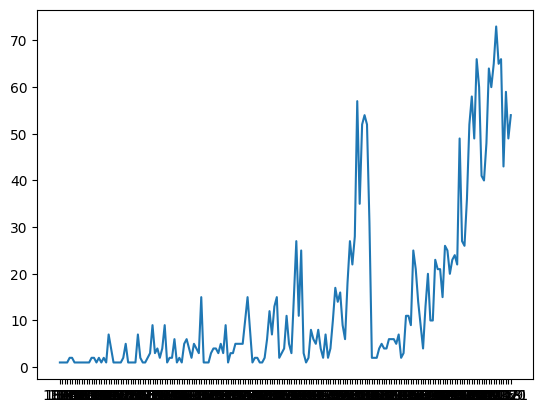

In [28]:
#gather what we need
import csv
from collections import Counter
import matplotlib.pyplot as plt

#where the magic happens
def get_data():
  file = open('global_shark_attacks.csv', 'r')
  reader = csv.DictReader(file)
  data = []
  for i in reader:
    data.append(i)
  return data

data = get_data()

def getTopNYears(dataset, n):
  years = []
  for row in dataset:
    year = row.get('year')
    year = year[:-2]
    if year.isdigit():
        years.append(year)
  yearCounter = Counter(years)
  return (yearCounter.most_common(int(n)))

def getTopNCountries(dataset, n):
  countries = []
  for row in dataset:
    country = row.get('country')
    if country.isalpha():
        countries.append(country)
  countryCounter = Counter(countries)
  return countryCounter.most_common(int(n))

def getCauses(dataset):
    causes = []
    for row in dataset:
        cause = row.get('type')
        proper = True
        alpha = 'abcdefghijklmnopqrstuvwxyz '
        for i in cause:
            if i.lower() not in alpha:
                proper = False
        if cause == 'Invalid':
            causes.append('Other')
        else:
            if proper == True:
                causes.append(cause)
    causeCounter = Counter(causes)
    return causeCounter

def sexStats(dataset):
    sexlist = []
    for row in dataset:
        sex = row.get('sex')
        if sex == 'M':
            sexlist.append('Male')
        if sex == 'F':
            sexlist.append('Female')
    sexcounter = Counter(sexlist)
    sexcount = []
    for i in sexcounter:
        sexcount.append(f'{i}: {sexcounter[i]}')
    return sexcount

def fatality(dataset):
    fatalities = []
    for row in dataset:
        fatal = row.get('fatal_y_n')
        if fatal == 'Y':
            fatalities.append('Fatal')
        if fatal == 'N':
            fatalities.append('Nonfatal')
    fatalcounter = Counter(fatalities)
    fatalcount = []
    for i in fatalcounter:
        fatalcount.append(f'{i}: {fatalcounter[i]}')
    return fatalcount

def getOldestYear(dataset):
    years = []
    smol = float('inf')
    for row in dataset:
        year = row.get('year')
        year = year[:-2]
        if year.isdigit():
            years.append(int(year))
    for i in years:
        if i < smol and i != 1:
            smol = i
    return smol

def getNewestYear(dataset):
    years = []
    big = float('-inf')
    for row in dataset:
        year = row.get('year')
        year = year[:-2]
        if year.isdigit():
            years.append(int(year))
    for i in years:
        if i > big:
            big = i
    return big

def getYearStats(dataset, n):
    L = []
    for row in dataset:
        year = row.get('year')
        if year[:-2] == str(n):
            L.append(row)
    return L

def yearStats(dataset):
    L = []
    fatalities = []
    sexlist = []
    count = len(dataset)
    #fatalities in that year
    for row in dataset:
        fatal = row.get('fatal_y_n')
        if fatal == 'Y':
            fatalities.append('Fatal')
        if fatal == 'N':
            fatalities.append('Nonfatal')
    fatalcounter = Counter(fatalities)
    fatalcount = []
    for i in fatalcounter:
        fatalcount.append(f'{i}: {fatalcounter[i]}')
    L.append(fatalcount)
    #sex stats in that year
    for row in dataset:
        sex = row.get('sex')
        if sex == 'M':
            sexlist.append('Male')
        if sex == 'F':
            sexlist.append('Female')
    sexcounter = Counter(sexlist)
    sexcount = []
    for i in sexcounter:
        sexcount.append(f'{i}: {sexcounter[i]}')
    L.append(sexcount)
    #country with most
    countries = []
    for row in dataset:
        country = row.get('country')
        if country.isalpha():
            countries.append(country)
    countryCounter = Counter(countries)

    counttuple = countryCounter.most_common(int(1))
    #returns a list of tuples, so have to make sure to inclued the [0 when unpacking]
    topcountry, attacks = counttuple[0]
    L.append(f"The country with the most shark attacks this year was {topcountry} with {attacks} attacks")
    L.append(f'Total number of attacks this year was {count}')
    return L

def setofyears(dataset):
    years = []
    for row in dataset:
        year = row.get('year')
        year = year[:-2]
        if year.isdigit():
           years.append(year)
    years = set(years)
    return years

def getCountryStats(dataset, n):
    L = []
    for row in dataset:
        country = row.get('country')
        if country.lower() == n.lower():
            L.append(row)
    return L

def countryStats(dataset):
    L = []
    fatalities = []
    sexlist = []
    count = len(dataset)

    #fatalities in that country
    for row in dataset:
        fatal = row.get('fatal_y_n')
        if fatal == 'Y':
            fatalities.append('Fatal')
        if fatal == 'N':
            fatalities.append('Nonfatal')
    fatalcounter = Counter(fatalities)
    fatalcount = []
    for i in fatalcounter:
        fatalcount.append(f'{i}: {fatalcounter[i]}')
    L.append(fatalcount)
    #sex stats in that country
    for row in dataset:
        sex = row.get('sex')
        if sex == 'M':
            sexlist.append('Male')
        if sex == 'F':
            sexlist.append('Female')
    sexcounter = Counter(sexlist)
    sexcount = []
    for i in sexcounter:
        sexcount.append(f'{i}: {sexcounter[i]}')
    L.append(sexcount)
    #year with most
    years = []
    for row in dataset:
        year = row.get('year')
        year = year[:-2]
        if year.isdigit():
            years.append(year)
    yearCounter = Counter(years)
    counttuple = yearCounter.most_common(1)
    #returns a list of tuples, so have to make sure to inclued the [0 when unpacking]
    topyear, attacks = counttuple[0]
    L.append(f"The year with the most shark attacks in this country was {topyear} with {attacks} attacks")
    L.append(f'Total number of attacks in this country is {count}')
    return L


def setofcountries(dataset):
    countries = []
    for row in dataset:
        country = row.get('country')
        if country.isalpha():
            countries.append(country.lower())
    countries = set(countries)
    return countries

def getgraph(dataset, n):
    L = []
    for row in dataset:
        country = row.get('country')
        if country.lower() == n.lower():
            L.append(row)
    return L

def graph(dataset):
    x = []
    y = []
    years = []
    for row in dataset:
        year = row.get('year')
        year = year[:-2]
        if year.isdigit():
            years.append(year)
    yearCounter = Counter(years)
    for i in yearCounter.keys():
      x.append(i)
    for i in yearCounter.values():
      y.append(i)
    x = x[::-1]
    y = y[::-1]
    plt.plot(x, y, label='Sharks')




#make it look pretty
def main():
    print('Data Analysis Options:')
    print('1) Years with most shark attacks \n2) Countries with most shark attacks \n3) Causes recorded \n4) Sex of individuals attacked \n5) Fatal Vs non-fatal atacks \n6) Oldest recorded year with an attack \n7) Most recent recorded year with an attack \n8) Statistics of a specific year \n9) Statistics of a specific country\n10) Create a graph of shark attacks over years in a country\n0) Exit')
    select = input('Please select an analysis option:')
    options = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
    while select not in options:
        select = input('Make sure your input is a number on the list of options:')
    else:
        if int(select) == 1:
            n = input('How many years would you like to view:')
            print( f'The top {n} years with the most shark attacks are: {getTopNYears(data, n)}' )
            next = input('Continue analysis? (y/n)')
            if next == 'y':
                main()
        elif int(select) == 2:
            n = input('How many countries would you like to view:')
            print( f'The top {n} countries with the most shark attacks are: {getTopNCountries(data, n)}' )
            next = input('Continue analysis? (y/n)')
            if next == 'y':
                main()

        elif int(select) == 3:
            print(getCauses(data))
            next = input('Continue analysis? (y/n)')
            if next == 'y':
                main()
        elif int(select) == 4:
            print(sexStats(data))
            next = input('Continue analysis? (y/n)')
            if next == 'y':
                main()
        elif int(select) == 5:
            print(fatality(data))
            next = input('Continue analysis? (y/n)')
            if next == 'y':
                main()

        elif int(select) == 6:
            print(f"The oldest recorded year with a shark attack is: {getOldestYear(data)}")
            next = input('Continue analysis? (y/n)')
            if next == 'y':
                main()
        elif int(select) == 7:
            print(f"The most recent recorded year with a shark attack is: {getNewestYear(data)}")
            next = input('Continue analysis? (y/n)')
            if next == 'y':
                main()
        elif int(select) == 8:
            year = input('What year would you like to look at (1000 - 2023): ')
            while year not in setofyears(data):
                year = input('Please select a valid year between 1000 and 2023: ')
            else:
                print('Fatalities:')
                print(yearStats(getYearStats(data, year))[0])
                print('Sex of victims:')
                print(yearStats(getYearStats(data, year))[1])
                print(yearStats(getYearStats(data, year))[2])
                print(yearStats(getYearStats(data, year))[3])
                next = input('Continue analysis? (y/n)')
                if next == 'y':
                  main()
        elif int(select) == 9:
            country = input('What country would you like to look at:')
            while country.lower() not in setofcountries(data):
                country = input('This country either isnt in the data set, or you have intered it in incorrectly. would you like a list of valid countries? (y/n)')
                if country == 'y':
                    for i in setofcountries(data):
                        print(i.capitalize())
                if country == 'n':
                    country = input('What country would you like to look at:')
            else:
                print('Fatalities:')
                print(countryStats(getCountryStats(data, country))[0])
                print('Sex of victims:')
                print(countryStats(getCountryStats(data, country))[1])
                print(countryStats(getCountryStats(data, country))[2])
                print(countryStats(getCountryStats(data, country))[3])
                next = input('Continue analysis? (y/n)')
                if next == 'y':
                  main()
        elif int(select) == 10:
            country = input('What country would you like to look at:')
            while country.lower() not in setofcountries(data):
                country = input('This country either isnt in the data set, or you have intered it in incorrectly. would you like a list of valid countries? (y/n)')
                if country == 'y':
                    for i in setofcountries(data):
                        print(i.capitalize())
                if country == 'n':
                    country = input('What country would you like to look at:')
            else:
              graph(getgraph(data, country))
        elif int(select) == 0:
            pass

main()

# Conclusion
This project was honestly my favorite part of this class, I working with python to analyze the different data in my dataset. There wer plenty of differnet challenges that i faced when trying to figure out this code, but i feel like ive improved at coding because of it. working my way through this project really helped engrave the different aspects of python and coding in my mind as i was having to recall different information ive learned over the quarter. overall, this project was a great way to apply what ive learned so far, and i feel like ive learned alot from just working through it.

# Reflection
in this project I learned about several new python modules and functions like Counter(which i used alot). the thing i struggeled with the most in this project was starting; trying to figure out how to organize the dataset into a way that i could easily read and analyze it took me a few tries. Im not sure how much ill need it in my future career, but ive been tying to learn coding as a personal hobby for a while, so the stuff ive learned from python will definitely help there.  
